# Lab 7: Support Vector Machine (SVM)

In this session, we will study some aspects of the SVM classifier and regressor. The training and optimization processes of the SVM models are out of the scope of this labs because it includes some complex mathematical equations and algorithm. Therefore, we will use the [SVM](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm) module from sklearn library.

First, we will compare the logistic regression and the SVM classifiers on a simple and separable dataset. Then, we will introduce the kernel trick that enhance capabilities of the SVM. We will work with "Gaussian" kernel and try to tune the model meta-parameters like the regularization parameter $\lambda$ and the standard deviation $\sigma$ of the "Gaussian" kernel. Finally, we will use the SVM for a regression problem and we will see how it works.

### Part 1: SVM vs Logistic Classifiers
The SVM classifier use a specific sample called "_support vector_" to define an hyperplane that divides the space into two regions: one for positive and one for negative labels. The equation of the hyperplane is defined by: $\theta^\top x=\theta_0+\theta_1 x_1+\dots+\theta_{n-1} x_{n-1}=0$. The SVM classifier try to maximize the margin between hyperplane and "_support vectors_" (set of closest samples to the chosen hyperplane) 

Note that the regularized cost function of a logistic classifiers is given by the following equation:

$$J_{Reg}(\theta)= \frac{1}{m}\sum_{i=1}^{m}\left [y_i\times (-log(sigmoid(\theta^\top x_i)))+(1-y_i)\times (-log(1-sigmoid(\theta^\top x_i)))\right ]+\frac{\lambda}{2m}\times\sum_{j=1}^{n-1} \theta_j^2$$

The cost function used in the SVM classifier is:

$$J_{SVM}(\theta)= C\sum_{i=1}^{m}\left [y_i\times cost_1(\theta^\top x_i)+(1-y_i)\times cost_0(\theta^\top x_i)\right ]+\frac{1}{2}\times\sum_{j=1}^{n-1} \theta_j^2 $$
$cost_0$ and $cost_1$ are two functions that penalize a sample "i" if it is not on the right side of the hyperplane. We notice that the SVM regularization parameter $C$ is the inverse of the logistic regularization parameter $\lambda$. Thus we write: $C=\frac{1}{\lambda}$  

## Preparation

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_bfgs
from sklearn import svm
from matplotlib.patches import Rectangle
from math import floor
from sklearn.svm import SVR
from sklearn.metrics.regression import mean_squared_error

**Question 1: ** The "data_1.txt" file contains 3 columns: 2 for the features "x_1" and "x_2" and the last column is for the labels "y".
- Load data from "data_1.txt" file. (use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library).
- Extract "x_1", "x_2" and "y" variables from "data" columns. (don't forget to add new axis to have 2D array with the right shape) 
- Determine X composed of three columns, a column of ones, a column of x_1 and a column of x_2. 

In [2]:
# load and extract data
# Type your code here
data= np.loadtxt('data_1.txt')
print("the size of data_1 is:",data.shape)

# Type your code here
m = data.shape[0]
x_1 = data[:,0][:,np.newaxis]
x_2 = data[:,1][:,np.newaxis]
y = data[:,2][:,np.newaxis]

X = np.concatenate((x_1,x_2), axis = 1)
X = np.concatenate((np.ones((m,1)),X), axis = 1)
n = X.shape[1]

print(X.shape)

the size of data_1 is: (51, 3)
(51, 3)


**Question 2:** 
- Call "fmin_bfgs" function to calculate the optimal theta. This function take as parameters: the name of cost function ("Reg_cost_func"), the name of gradient cost function ("Reg_grad_cost_func") and the initial theta ("theta0").
- Print the optimal theta.

In [44]:
# regularized cost and gradient function
def sigmoid(z):
    return np.ones(z.shape)/(1+np.exp(-z))
def Reg_cost_func(theta):
    J=np.sum(-y*np.log(sigmoid(np.dot(X,theta[:,np.newaxis]))))-np.sum((1-y)*np.log(1-sigmoid(np.dot(X,theta[:,np.newaxis]))))+lambda_/2*np.sum(theta[1:]**2)
    return J/m  
def Reg_grad_cost_func(theta):
    g=(1/m)*(np.dot(X.transpose(),(sigmoid(np.dot(X,theta[:,np.newaxis]))-y))+lambda_*np.concatenate((np.zeros((1,1)),theta[1:,np.newaxis]),axis=0))  # this is the vectorized implementation
    g.shape=(g.shape[0],)
    return g  

# regularization parameter
lambda_= 13

# calculate theta_opt
theta0=np.zeros((n,),dtype=float)
# Type your code here
theta_opt= fmin_bfgs(Reg_cost_func, theta0, Reg_grad_cost_func)
print("the optimal vector theta is:", theta_opt)

Optimization terminated successfully.
         Current function value: 0.513388
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
the optimal vector theta is: [-3.77123919  0.54474117  0.68205544]


**Question 3: ** Now you should use the SVM classifier with a linear kernel on the same "data_1" and compare the result with the logistic classifier.
- Define the SVM regularization parameter "C" from the previous assigned value to "lambda". (Note: $C=\frac{1}{\lambda}$. Be careful to the case $\lambda=0$) 
- Use [SVM classifier](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) class from  sklearn library to define "lin_svm" a SVM classifier with a regularization parameter "C" and a "linear" kernel. 
- Use [fit](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.fit) function of "lin_svm" object to train the model. Then, compare the result of the two classifiers (Logistic and SVM)
- Try different value of regularization parameter $\lambda$ ( or C parameter) like 0, 1, 100.. what do you notice in case there is no regularization?

In [45]:
# format data for SVM cassifier
X2=np.concatenate((x_1,x_2),axis=1) 
y2=y[:,0]

# create and train SVM classifier
# Type your code here
if lambda_ is not 0:
    C = 1/lambda_
else:
    C = np.inf

lin_svm = svm.SVC(C,kernel='linear')
lin_svm.fit(X2,y2)

print(lin_svm)
#compare two classifier result

SVC(C=0.07692307692307693, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


<IPython.core.display.Javascript object>


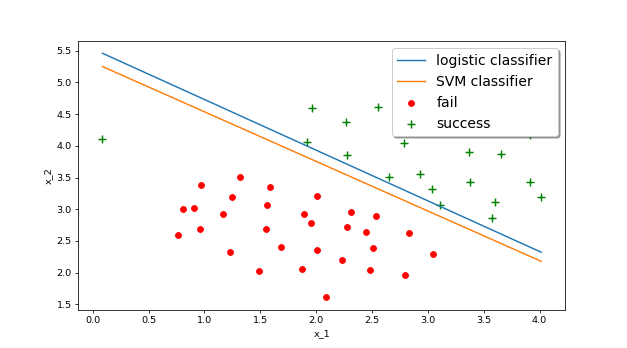

In [46]:
# plot data and models
x_1_min = np.min(X[:,1])
x_1_max = np.max(X[:,1])
plt.figure("Visualize data_1 and models",figsize=(9,5))
plt.scatter(x_1[y==0], x_2[y==0],  color='red',label='fail')
plt.scatter(x_1[y==1], x_2[y==1],  color='green',marker='+',s=80, label='success')
plt.plot([x_1_min,x_1_max],[(-theta_opt[0]-theta_opt[1]*x_1_min)/theta_opt[2],(-theta_opt[0]-theta_opt[1]*x_1_max)/theta_opt[2]],label="logistic classifier")
plt.plot([x_1_min,x_1_max],[(-lin_svm.intercept_[0]-lin_svm.coef_[0,0]*x_1_min)/lin_svm.coef_[0,1],(-lin_svm.intercept_[0]-lin_svm.coef_[0,0]*x_1_max)/lin_svm.coef_[0,1]],label="SVM classifier")
plt.xlabel('x_1')
plt.ylabel('x_2')
legend = plt.legend(loc='best', shadow=True, fontsize='x-large')


Let's try different value of regularization parameter. 
- For lambda = 0, we can see that the logistic classifier and the SVM classifier behaves the same
- For lambda = 1, the 2 classes are well separated.
- For lambda = 100, all the points are "on the left" side, the data is not separated at all.

For the SVM classifier :
For lambda approximately =< 30, the data is well separated 

For the logistic classifier :
For lambda approximately =< 10, the data is well separated 

<font color="green">**Note: **</font> 
- We note that the parameters (intercept and coefficient) of logistic regression and linear svm give are very close. Besides we get two close decision boundaries. Thus, we could say that a linear svm model with parameter $C=\frac{1}{\lambda}$ is equivalent to regularized logistic model with parameter $\lambda$.

### Part 2: SVM kernels trick for more complex data 
If the data is complex and the linear decision boundary is not sufficient to separate it, we could apply a transformation on our data and project it to a new space using kernels. Then, we could use the SVM classifier on this new space with a higher dimension (up to infinite dimension) generally where it is more likely to find an hyperplane that separates well the data. Hence, the hyperplane equation becomes: $h_\theta(x)=\theta^\top \phi(x)+\theta_0=0$.  

In fact, the transformation $\phi$ is a complex function and in most cases, it is not known explicitly. However, the SVM optimization process allows us to calculate $\alpha^*_i$'s where: 
$ \left\{\begin{matrix}
h_\theta(x)=\sum_{i=1}^m\alpha^*_i K(x,x_i)+\theta_0
\\ K(x,x_i)=\phi(x)^\top\phi(x_i)
\end{matrix}\right.$  

$K(x,x_i)$ represents the kernel and its formulas is known explicitly in contrast to $\phi(x)$. In this part, we will use the "Gaussian" kernel (a.k.a. "Radial Basis Function")  given by: $$K(x_1,x_2)=exp(\frac{-\left \| x_1-x_2 \right \|^2}{2\sigma^2})=exp(-\gamma \left \| x_1-x_2 \right \|^2)$$

**Question 1: ** The "data_2.txt" file contains 3 columns: 2 for the features "x_1" and "x_2" and the last column is for the labels "y".
- Load data from "data_2.txt" file. (use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library).
- Extract "x_1", "x_2" and "y" variables from "data" columns. (don't forget to add new axis to have 2D array with the right shape) 

In [48]:
# load and extract data
# Type your code here
data = np.loadtxt("data_2.txt")
print("the size of data_2 is:",data.shape)
# Type your code here
m = data.shape[0]
x_1 = data[:,0][:,np.newaxis]
x_2 = data[:,1][:,np.newaxis]
y = data[:,2]
print(y.shape)

the size of data_2 is: (863, 3)
(863,)


In [49]:
# compute transformed data
X10,X11=np.meshgrid(data[:,0], data[:,0])
X20,X21=np.meshgrid(data[:,1], data[:,1])
X0=np.concatenate((X10[...,np.newaxis],X20[...,np.newaxis]),axis=-1)  
X1=np.concatenate((X11[...,np.newaxis],X21[...,np.newaxis]),axis=-1)


**Question 2: **
- Implement "Gaussian_kernel" function according to the given equation above.

In [50]:
def Gaussian_kernel(x1,x2,sigm,ax=-1):
    # ** your code here**
    K = np.exp(-(np.sum((x2-x1)**2,axis = ax))/(2*sigm**2))
    return K

**Question 3: **
- Use [SVM classifier](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) class from  sklearn library to define "svm_clf" a SVM classifier with a regularization parameter "C" and a "precomputed" kernel. 
- Use [fit](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.fit) function of "svm_clf" object and "X" and "y" vectors to train the model.

In [51]:
# Gaussian Kernel
sigma=0.5     # standard deviation
print(X0.shape)
X=Gaussian_kernel(X0,X1,sigma)
print(X.shape)
# Type your code here
C=1000
svm_clf = svm.SVC(C,kernel='precomputed')
svm_clf.fit(X,y)

print(svm_clf)
     

(863, 863, 2)
(863, 863)
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


Let's visualize the data

(100, 100, 863, 2)
(100, 100, 863, 2)


<IPython.core.display.Javascript object>


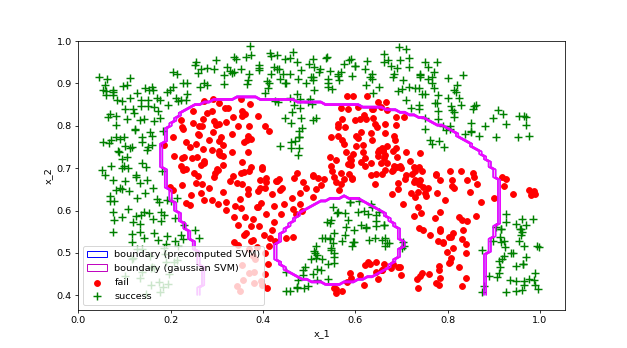

In [52]:
# calculate the mesh grid for decision boundary
u1=np.linspace(0,1,100)
u2=np.linspace(0.4,1,100)
u1, u2 = np.meshgrid(u1, u2)
XX0=np.concatenate((np.tile(u1[...,np.newaxis,np.newaxis],(1,1,m,1)),np.tile(u2[...,np.newaxis,np.newaxis],(1,1,m,1))),axis=-1)
XX1=np.concatenate((np.tile(data[np.newaxis,np.newaxis,:,0,np.newaxis],(*u1.shape,1,1)),np.tile(data[np.newaxis,np.newaxis,:,1,np.newaxis],(*u1.shape,1,1))),axis=-1)
print(XX0.shape)
print(XX1.shape)
X3=Gaussian_kernel(XX0,XX1,sigma)
X3bis=X3.reshape((X3.shape[0]*X3.shape[1],X3.shape[2]))
Zbis =  svm_clf.predict(X3bis)
Z=Zbis.reshape((X3.shape[0],X3.shape[1]))

# plot data and decision boundary
plt.figure("Visualize data_2 and models",figsize=(9,5))
fail=plt.scatter(x_1[y==0], x_2[y==0],  color='red',label='fail')
succ=plt.scatter(x_1[y==1], x_2[y==1],  color='green',marker='+',s=80, label='success')
ctr = plt.contour(u1, u2, Z,1,colors="blue",alpha=.7)
plt.xlabel('x_1')
plt.ylabel('x_2')
precom_bound = Rectangle((0, 0), 3, 4, fc="w", fill=False, edgecolor="b", linewidth=1)
plt.legend([precom_bound,fail,succ], ("boundary (precomputed SVM)","fail","success"),loc='best')

    With this approch we were able to separate complex data.

**Question 4: ** Now we will use the SVM classifier with the "rbf" (Gaussian) kernel that computes transformed data automatically instead of computing it using the implemented "Gaussian_kernel" function. 
- Define the Gaussian kernel parameter "Gamma" from the previously assigned value to the standard deviation "sigma". (Recall: $\gamma=\frac{1}{2\sigma^2}$).
- Use the [SVM classifier](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) class from  sklearn library to define "gauss_svm" an SVM classifier with a regularization parameter "C", an "rbf" kernel and "Gamma" parameter.
- Use [fit](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.fit) function of "gauss_svm" object and "X" and "y" vectors to train the model. Then, compare result with the previous classifier.

In [54]:
X=np.concatenate((x_1,x_2),axis=1)

# SVM classifier

Gamma = 1/(2*(sigma**2))
gauss_svm = svm.SVC(C, kernel='rbf', gamma = Gamma)
gauss_svm.fit(X,y) 


SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
# calculate the mesh grid for decision boundary
u1=np.linspace(0,1,100)
u2=np.linspace(0.4,1,100)
u1, u2 = np.meshgrid(u1, u2)
X33=np.concatenate((u1[...,np.newaxis],u2[...,np.newaxis]),axis=-1)
X33bis=X33.reshape((X33.shape[0]*X33.shape[1],X33.shape[2]))
Zbis =  gauss_svm.predict(X33bis)
Z3=Zbis.reshape((X33.shape[0],X33.shape[1]))

#plot decision boundary
ctr = plt.contour(u1, u2, Z3,1,colors="magenta",alpha=.7)
gauss_bound = Rectangle((0, 0), 3, 4, fc="w", fill=False, edgecolor="m", linewidth=1)
plt.legend([precom_bound,gauss_bound,fail,succ], ("boundary (precomputed SVM)","boundary (gaussian SVM)","fail","success"),loc='best')

no difference

**Question 5:** 
- Determine the classification prediction by the SVM classifier of the data point of coordinate (0.5,0.8).

In [57]:
x = [[0.5, 0.8]]
print(gauss_svm.predict(x))

[0.]


### Part 3: Tune standard deviation $\sigma$ with K-fold cross validation

In this part, we will tune the standard deviation $\sigma$ of the Gaussian kernel using K-fold method to evaluate the performance on cross validation set. Then, we will select the value of sigma that gives the best accuracy.
The K-fold consists dividing the training set to K blocks. Then, we consider one of the blocks as validation set (or test set)  and we consider the rest of data as training set. After fitting the model we evaluate its performance en the chosen validation fold (group). We repeat this process on all the K-folds. Hence, we get K estimations of the performance then we calculate their mean to get a more reliable estimation.
![k-fold-diagram](k-fold-diagram.png)

**Question 1: **
- Load the data from "data_3.txt" file. (use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library).

In [58]:
# load data
# Type your code here
data=np.loadtxt('data_3.txt')

# shuffle data
np.random.seed(5190969)
data=np.random.permutation(data)
print("the size of data_3 is:",data.shape)

#extract data
m = data.shape[0] # number of samples
x_1=data[:,0,np.newaxis]  
x_2=data[:,1,np.newaxis]  
y=data[:,2]    
X=np.concatenate((x_1,x_2),axis=1) 

the size of data_3 is: (400, 3)


**Question 2: **
- Extract the cross validation set ("X_val" and "y_val") from "X" and "y" data.
- Use [fit](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR.fit) function of "gauss_svm" object and "X_train" and "y_train" vectors to train the model. 
- Use [predict](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR.predict) function of "gauss_svm" object and predict "y_val_pred" the output of cross validation data "X_val". 
- Calculate the validation accuracy.
- Calculate the mean of "val_accuracy" vector that represents the accuracy among all folds.

In [59]:
C = 1  # regularization parameter
K = 5  # number of cross validation folds
fold_size = int(floor(m/K))  #size of fold
sigma_list = [0.01, 0.03, 0.1,0.3, 1,3]

# loop over different sigma values
for sigma in sigma_list:
    Gamma=1/2/(sigma**2) 
    val_accuracy=np.zeros((K,))
    # loop over different folds and calculate the mean accuracy
    for k in range(K):
        # Type your code here
        X_val = X[k*fold_size:(k+1)*fold_size]
        y_val = y[k*fold_size:(k+1)*fold_size]
        
        X_train = np.delete(X,np.s_[k*fold_size:(k+1)*fold_size],axis=0)
        y_train = np.delete(y,np.s_[k*fold_size:(k+1)*fold_size],axis=0)
        gauss_svm = svm.SVC(C=C,kernel='rbf',gamma=Gamma)
        gauss_svm.fit(X_train,y_train)
        # Type your code here
        
        y_val_pred = gauss_svm.predict(X_val)  
        val_accuracy[k]=sum(y_val_pred==y_val)/len(y_val)
    
    # Type your code here
    mean_val_accuracy = val_accuracy.mean()
    print("The {}-fold cross validation mean accuracy for \u03C3=".format(K), sigma," is: ",mean_val_accuracy,"%")

The 5-fold cross validation mean accuracy for σ= 0.01  is:  0.6425 %
The 5-fold cross validation mean accuracy for σ= 0.03  is:  0.9075 %
The 5-fold cross validation mean accuracy for σ= 0.1  is:  0.9299999999999999 %
The 5-fold cross validation mean accuracy for σ= 0.3  is:  0.93 %
The 5-fold cross validation mean accuracy for σ= 1  is:  0.9225 %
The 5-fold cross validation mean accuracy for σ= 3  is:  0.8625 %


<font color="green">**Note: **</font> 
- We note that the validation accuracy is maximized for some value of the standard deviation $\sigma$ of the gausian kernel. Hence, we may choose $0.1$ or $0.3$ as best value of $\sigma$ or we may also test some other value in between (in the interval $[0.1~,~ 0.3]$).

**Question 3: ** 
- Select "best_sigma" value that gives a maximum accuracy.

In [60]:
# train best svm classifier
# Type your code here
best_sigma = 0.3
Gamma=1/2/(best_sigma**2) 
X_train = np.delete(X,np.s_[fold_size:2*fold_size],axis=0)
y_train = np.delete(y,np.s_[fold_size:2*fold_size],axis=0)
gauss_svm = svm.SVC(C=C,kernel='rbf',gamma=Gamma)
gauss_svm.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5.555555555555555,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

<IPython.core.display.Javascript object>


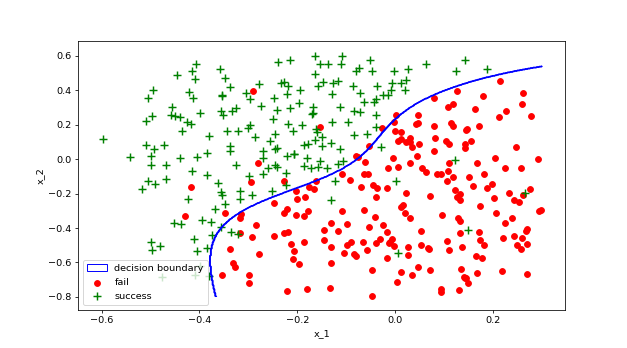

In [61]:
# calculate the mesh grid for contour plot
u1=np.linspace(-0.6,0.3,500)
u2=np.linspace(-0.8,0.6,500)
u1, u2 = np.meshgrid(u1, u2)
X33=np.concatenate((u1[...,np.newaxis],u2[...,np.newaxis]),axis=-1)
X33bis=X33.reshape((X33.shape[0]*X33.shape[1],X33.shape[2]))
Zbis =  gauss_svm.predict(X33bis)
Z3=Zbis.reshape((X33.shape[0],X33.shape[1]))

# plot data and boundary
plt.figure("Visualize data_3 and boundary",figsize=(9,5))
fail=plt.scatter(x_1[y==0], x_2[y==0],  color='red',label='fail')
succ=plt.scatter(x_1[y==1], x_2[y==1],  color='green',marker='+',s=80, label='success')
ctr = plt.contour(u1, u2, Z3,1,colors="blue")
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend([precom_bound,fail,succ], ("decision boundary","fail","success"),loc='best')

### Part 4: Support Vector Machine for regression

There is an SVM version for a regression problem. The idea is to calculate a hypothesis function using the following form: $h_\theta(x)=\theta^\top \phi(x)+\theta_0$. Then, it tries to minimize a cost function that penalizes only the points that are far from the calculated model ($h_\theta(x)$) more than $\epsilon$.
![Support Vector Regression](SVR.png)

The SVR cost function is given by:
$$J_{SVR}(\theta)=
\left\{\begin{matrix}
 0& if \left | y-h_\theta(x)) \right |\leq\epsilon\\ 
\left | y-h_\theta(x)) \right |-\epsilon  & otherwise 
\end{matrix}\right.$$

In this part, we will use SVR (Support Vector Regression) with "rbf" (Gaussian) kernel and with "epsilon" parameter in order to optimize the previous cost function and determine a regression model for the data.  

In [62]:
# generate random data
np.random.seed(0)
m = 15
x = np.linspace(0,10,m) + np.random.randn(m)/5
y = np.sin(x)+x/6 + np.random.randn(m)/10
X=x[:,np.newaxis]

**Question 1: ** 
- Use [SVR](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR) class from  sklearn library to define "svm_regr" a SVM classifier with Regularization parameter "C=1", "rbf" kernel and "gamma=0.5" parameter.
- Use [fit](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR.fit) function of "svm_regr" object and "X" and "y" vectors to train the model. 
- Use [predict](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR.predict) function of "svm_regr" object and predict "y_pred" the output of data "X". 
- Try to train the model with different values of the parameter "epsilon" of SVR (try values like 0.1, 0.5, 1,1.5). What do you notice?

In [63]:
# SVM regression model
# Type your code here
Epsilon= [0.1, 0.5, 1, 1.5]
for e in Epsilon:
    svm_regr = svm.SVR(C=1,kernel='rbf',gamma=0.5,epsilon=e)
    svm_regr.fit(X,y)  
    y_pred= svm_regr.predict(X)  
    
    print("epsilon:", e)
    print("The mean squared error of the SVR model is:",mean_squared_error(y, y_pred))

epsilon: 0.1
The mean squared error of the SVR model is: 0.016839357152704213
epsilon: 0.5
The mean squared error of the SVR model is: 0.14550915394102182
epsilon: 1
The mean squared error of the SVR model is: 0.4287058992614264
epsilon: 1.5
The mean squared error of the SVR model is: 0.6164495858695054


Higher is epsilon and higher is the error. In fact, in the formula, we can see that id the error is low, then the cost function is equal to 0. If it is high,  then we will accept a higher error rate.

<IPython.core.display.Javascript object>


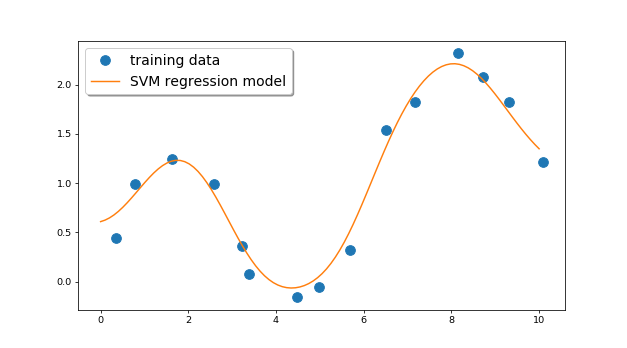

In [64]:
# calculate and plot the model
X1=np.linspace(0,10,100)
svm_regr = svm.SVR(C=1,kernel='rbf',gamma=0.5,epsilon=0.1)
svm_regr.fit(X,y)  
Y =  svm_regr.predict(X1[:,np.newaxis])
plt.figure("different polynomial models",figsize=(9,5))
plt.plot(X, y, 'o', label='training data', markersize=10)
plt.plot(X1, Y,label="SVM regression model")
plt.legend(loc='best', shadow=True, fontsize='x-large')

The optimal epsilon is 0.1

<font color="green">**Note: **</font> 
- As we see above the SVM model could work well for regression problem if the parameter $\epsilon$ is well chosen. In fact, if epsilon is to high the model give much tolerance to error and the optimization process of SVM will decrease model coefficients to the point we get an horizontal line for $\epsilon$ value like 1,5. However, for smaller epsilon SVM will model better the data but it will require more calculation.
- We note also when SVM model well the data ($\epsilon$ is enough small), there is some border distortion due to absence of data beyond extremity.